In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/yuanh.er/Desktop/Season4/20-24_weather_with_feel_factor.csv"
df = pd.read_csv(file_path)

df['Time'] = pd.to_datetime(df['Time'])

df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day
df['Hour'] = df['Time'].dt.hour

print(df[['Time', 'RH2M']].head())



                 Time   RH2M
0 2020-01-01 00:00:00  83.66
1 2020-01-01 01:00:00  83.71
2 2020-01-01 02:00:00  85.02
3 2020-01-01 03:00:00  85.97
4 2020-01-01 04:00:00  85.88


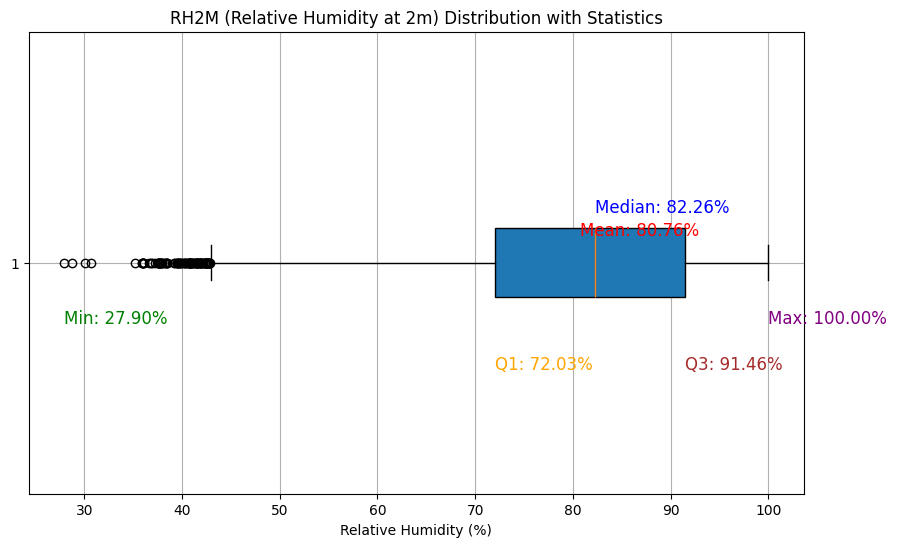

In [2]:
### 湿度 (RH2M) 分布的统计分析 ###
mean_humidity = df['RH2M'].mean()
median_humidity = df['RH2M'].median()
min_humidity = df['RH2M'].min()
max_humidity = df['RH2M'].max()
q1_humidity = df['RH2M'].quantile(0.25)
q3_humidity = df['RH2M'].quantile(0.75)

plt.figure(figsize=(10, 6))
box = plt.boxplot(df['RH2M'], vert=False, patch_artist=True)

plt.text(mean_humidity, 1.05, f'Mean: {mean_humidity:.2f}%', verticalalignment='bottom', fontsize=12, color='red')
plt.text(median_humidity, 1.1, f'Median: {median_humidity:.2f}%', verticalalignment='bottom', fontsize=12, color='blue')
plt.text(min_humidity, 0.9, f'Min: {min_humidity:.2f}%', verticalalignment='top', fontsize=12, color='green')
plt.text(max_humidity, 0.9, f'Max: {max_humidity:.2f}%', verticalalignment='top', fontsize=12, color='purple')
plt.text(q1_humidity, 0.8, f'Q1: {q1_humidity:.2f}%', verticalalignment='top', fontsize=12, color='orange')
plt.text(q3_humidity, 0.8, f'Q3: {q3_humidity:.2f}%', verticalalignment='top', fontsize=12, color='brown')

plt.xlabel("Relative Humidity (%)")
plt.title("RH2M (Relative Humidity at 2m) Distribution with Statistics")
plt.grid()
plt.show()


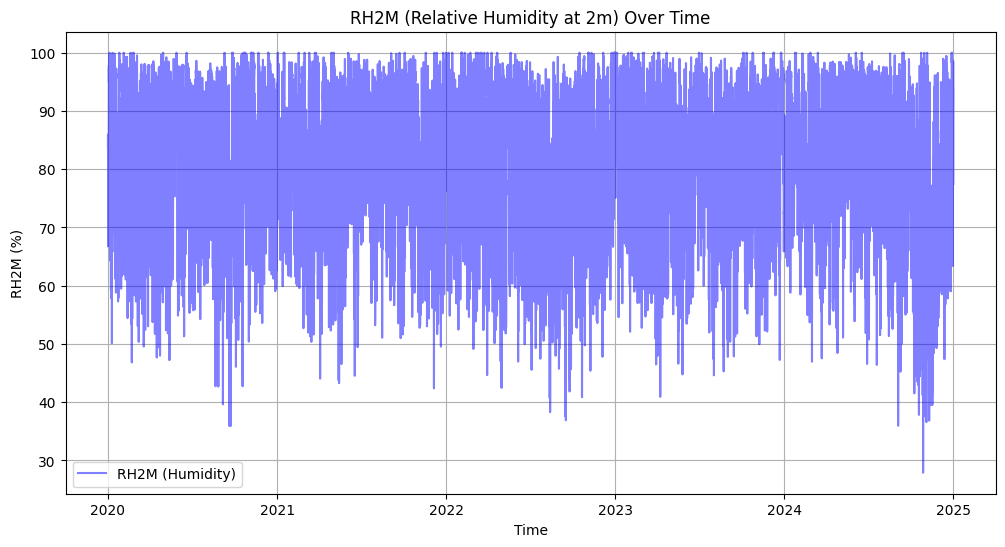

In [3]:
### 湿度随时间变化 ###
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['RH2M'], label="RH2M (Humidity)", color='b', alpha=0.5)
plt.xlabel("Time")
plt.ylabel("RH2M (%)")
plt.title("RH2M (Relative Humidity at 2m) Over Time")
plt.legend()
plt.grid()
plt.show()


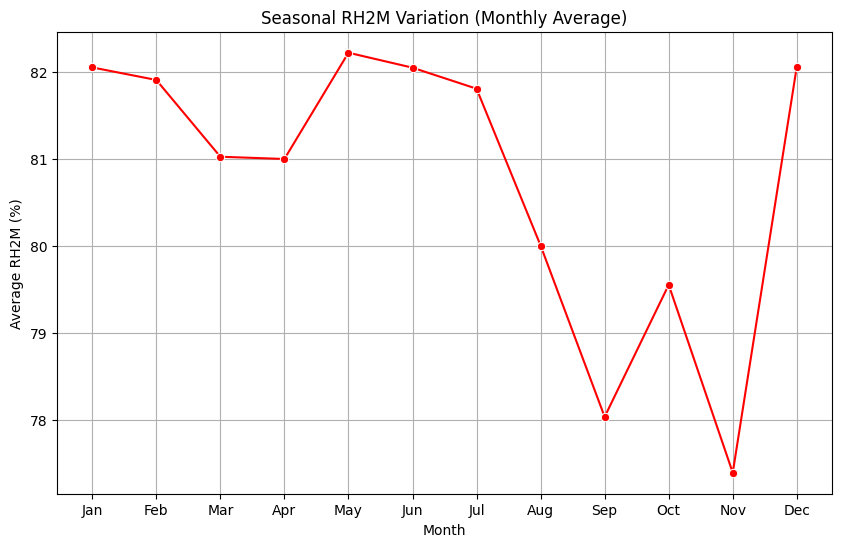

In [4]:
### 季节性湿度变化（按月平均） ###
monthly_avg_humidity = df.groupby('Month')['RH2M'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_humidity.index, y=monthly_avg_humidity.values, marker="o", linestyle="-", color="r")
plt.xlabel("Month")
plt.ylabel("Average RH2M (%)")
plt.title("Seasonal RH2M Variation (Monthly Average)")
plt.xticks(range(1, 13), 
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()


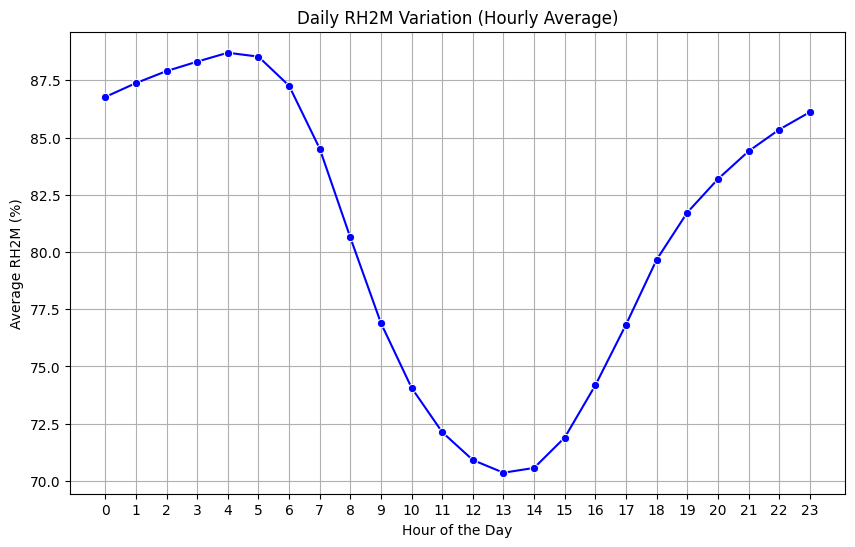

In [5]:
### 日内湿度变化（按小时平均） ###
hourly_avg_humidity = df.groupby('Hour')['RH2M'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg_humidity.index, y=hourly_avg_humidity.values, marker="o", linestyle="-", color="b")
plt.xlabel("Hour of the Day")
plt.ylabel("Average RH2M (%)")
plt.title("Daily RH2M Variation (Hourly Average)")
plt.xticks(range(0, 24))
plt.grid()
plt.show()


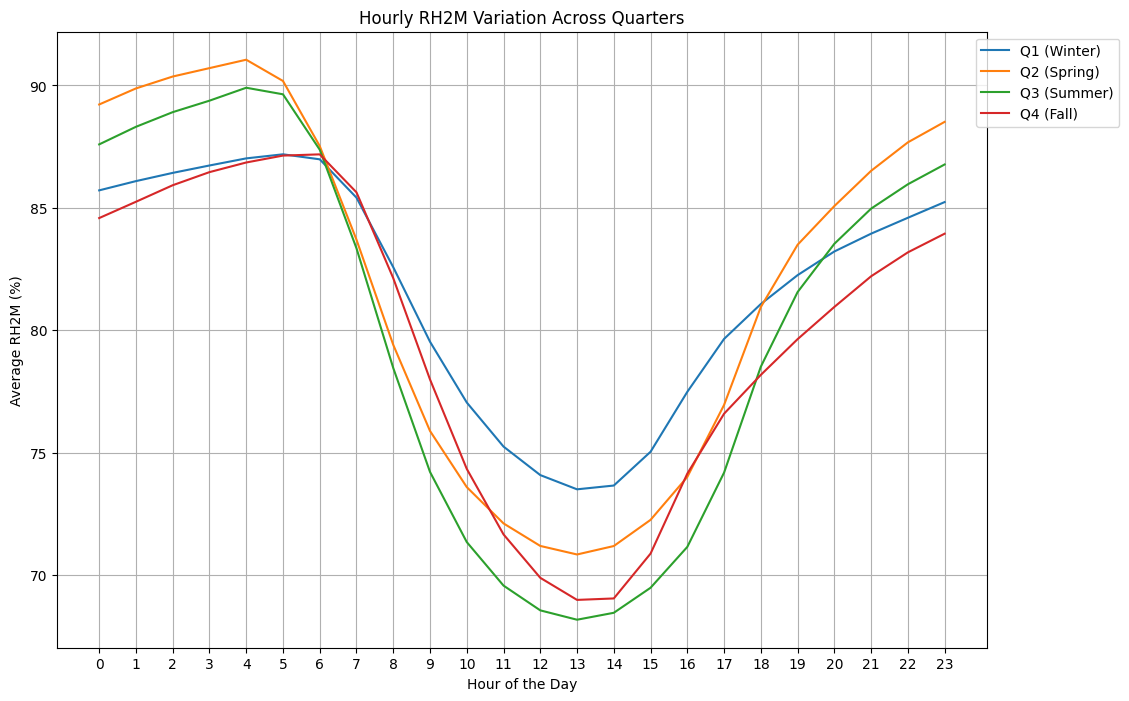

In [6]:
### 按季度拆分的日内湿度变化 ###
import numpy as np

df['Quarter'] = np.where(df['Month'].isin([1, 2, 3]), 'Q1 (Winter)',
                np.where(df['Month'].isin([4, 5, 6]), 'Q2 (Spring)',
                np.where(df['Month'].isin([7, 8, 9]), 'Q3 (Summer)', 'Q4 (Fall)')))

plt.figure(figsize=(12, 8))

# 按季度绘制平均湿度的小时变化
for quarter in ['Q1 (Winter)', 'Q2 (Spring)', 'Q3 (Summer)', 'Q4 (Fall)']:
    hourly_avg = df[df['Quarter'] == quarter].groupby('Hour')['RH2M'].mean()
    plt.plot(hourly_avg.index, hourly_avg.values, label=quarter)

plt.xlabel("Hour of the Day")
plt.ylabel("Average RH2M (%)")
plt.title("Hourly RH2M Variation Across Quarters")
plt.xticks(range(0, 24))
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.grid()
plt.show()

